In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

**Note -** There is a package which We'd like you to install, which probably isn't present in your package arsenal right now. Just run the below code to install the package through the terminal. If you're interested in knowing more details about the syntax, check [here](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/). Don't worry about what this package is, we will explore this in the later part of the tutorial. 

In [2]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [3]:
import pandas_profiling as pp

# Topics we'll be covering in this tutorial

1. boxplots, IQR, quartiles, outliers detection
2. correlation plots
3. histograms 
4. Normalisation techniques (multiply, min-max norm to convert all into one form, z transform etc)
5. Playing around with plotting (plot size, legend, title, colors, plot stacking)
6. Distribution plots, types of skew, skew check through mean, median and mode, skew removal (log, square etc)
7. Visualising categorical data
8. What kind of plot should I be using? 
9. And more 

## Some important shortcuts to speed up experimentation
Watch and learn

* D, D - delete
* M - convert to markdown cell
* Y - convert to code cell
* A - add cell above
* B - add cell below
* Z - undo
* Shift + enter - run

## Distribution skew
Your data can be skewed, as nature is always biased towards the dominant component. If you take dietary habits, the gradient of vegetarianism will be highly skewed, with very few who are vegans. If you take distribution of heights, there will be very few who are above 6ft and so. 

### Types of skew
Skewness can be towards the left or towards the right. It is not easy to observe skew by staring at your data, you need to visualise it. 

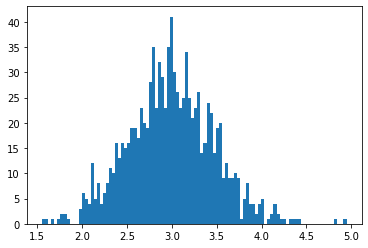

In [4]:
q = np.random.normal(3, 0.5, 1000)
plt.hist(q, bins = 100)
plt.show()

I was too lazy to find datasets with skew, so I simulated it for you. Logarithmic and polynomial functions can be used to remove skew from data, and we'll see how that works by introducing skew using these functions!  

/Users/shreyasgupta/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


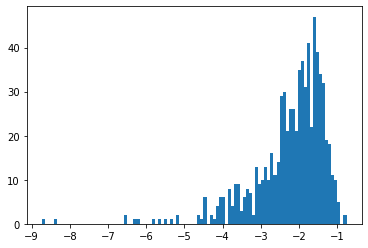

In [5]:
plt.hist(np.log(np.log(np.log(q))), bins = 100)
plt.show()

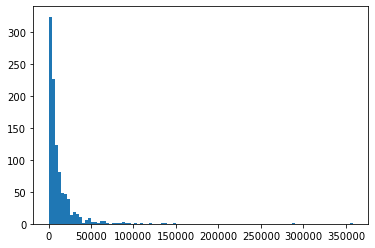

In [6]:
plt.hist(np.power(q, 8), bins = 100)
plt.show()

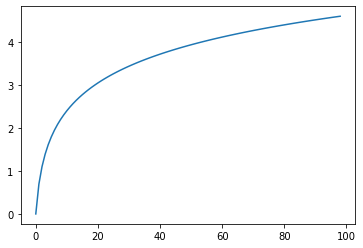

In [7]:
plt.plot(np.log(np.arange(1, 100, 1)))
plt.show()

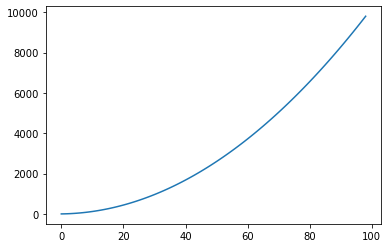

In [8]:
plt.plot(np.power(np.arange(1, 100, 1), 2))
plt.show()

<AxesSubplot:xlabel='abv'>

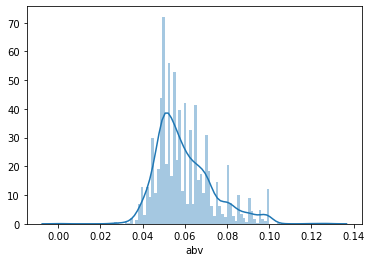

In [9]:
beer = pd.read_csv("beers.csv")
sns.distplot(beer.abv, bins = 100)

<AxesSubplot:xlabel='abv'>

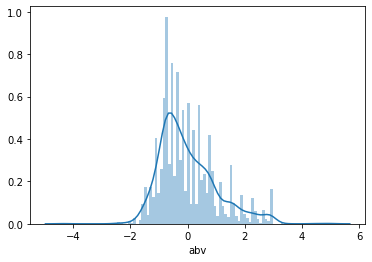

In [10]:
#minmax normalisation
def minmaxnorm(x):
    return ((x - beer.abv.min())/(beer.abv.max() - beer.abv.min()))

#Z transform "standardisation"
def ztransform(x):
    return (x - beer.abv.mean())/beer.abv.std()

sns.distplot(beer.abv.apply(lambda x: ztransform(x)), bins = 100)

Note - There is a difference between normalisation and standardisation. Standardisation tries to center everything to zero mean where as min max simply re-scales and brings everything closer to the current mean. When to use what? it depends on what kind of data you have. 

<AxesSubplot:xlabel='axis1', ylabel='axis2'>

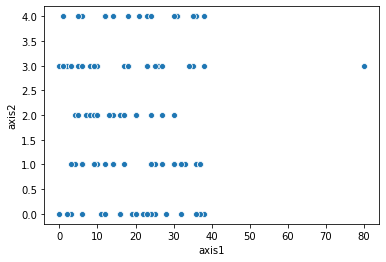

In [110]:
testd1 = np.random.randint(40, size=100)
testd2 = np.random.randint(5, size=100)
testnew = np.vstack((testd1, testd2))
norm = pd.DataFrame(testnew.transpose(), columns=['axis1', 'axis2'])
outlier = pd.DataFrame({"axis1": [80], "axis2":[3]})
final = norm.append(outlier, ignore_index = True)
sns.scatterplot(x = final.axis1, y = final.axis2)

## Boxplots

Boxplots are used to better understand the parameters of a distribution. It essentially contains two tails or whiskers, the inter quartile range (IQR), the 1st and the 3rd quartile boxes, the median line and outlier dots.  

In [20]:
avo = pd.read_csv("avocado.csv")
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [52]:
scaler = StandardScaler()

In [61]:
avo[['AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']] = scaler.fit_transform(avo[['AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,conventional,2015,Albany
1,1,2015-12-20,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,conventional,2015,Albany
2,2,2015-12-13,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,conventional,2015,Albany
3,3,2015-12-06,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,conventional,2015,Albany
4,4,2015-11-29,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,conventional,2015,Albany


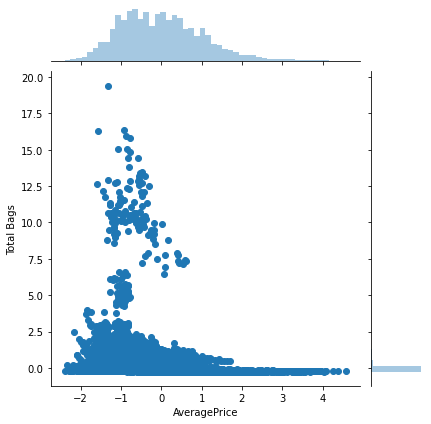

In [58]:
sns.jointplot(x = avo.AveragePrice, y = avo['Total Bags'])

<AxesSubplot:xlabel='AveragePrice'>

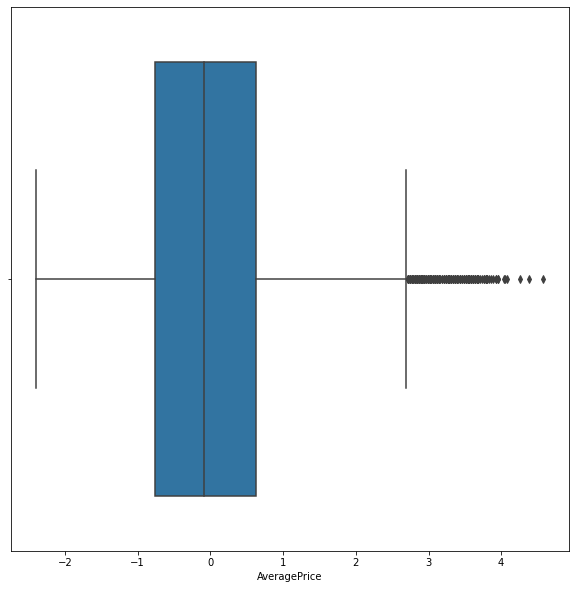

In [65]:
plt.figure(figsize=(10,10))
sns.boxplot(avo.AveragePrice)

### calculate the IQR and other required vars
1. q1 = np.quantile(data, 0.25) or dataframe.quantile(0.25)
2. q3 = np.quantile(data, 0.75) or dataframe.quantile(0.75)
3. iqr = q3 - q1
4. outlier_range = 1.5*iqr
5. r_whisker = q3 + outlier_range
6. l_whisker = q1 - outlier_range

In [32]:
def remove_outliers(x):
    q1 = avo.AveragePrice.quantile(q = 0.25)
    q3 = avo.AveragePrice.quantile(q = 0.75)
    iqr = q3 - q1
    outlier_range = 1.5*iqr
    r_whisker = q3 + outlier_range
    l_whisker = q1 - outlier_range
    if (x > r_whisker):
        return q3
    elif (x < l_whisker):
        return q1
    else: 
        return x

In [39]:
newavo = avo.AveragePrice.apply(lambda x: remove_outliers(x))

<AxesSubplot:xlabel='AveragePrice'>

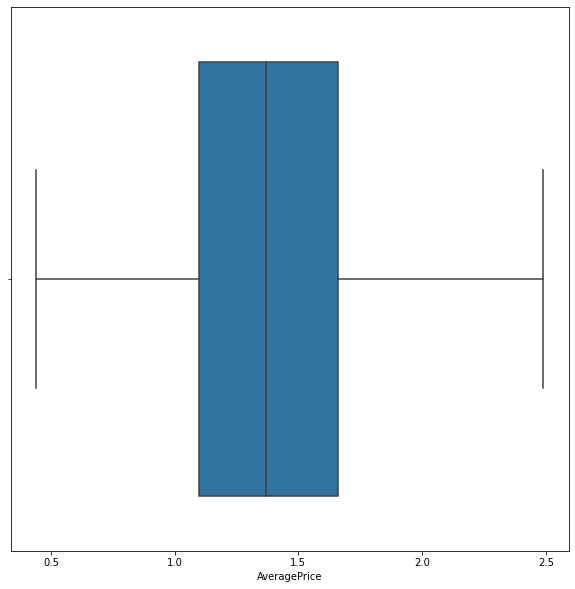

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(newavo)

<AxesSubplot:xlabel='AveragePrice'>

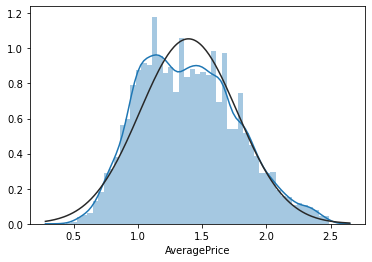

In [74]:
sns.distplot(newavo,fit=norm)

((array([-3.95678874, -3.73949546, -3.62054525, ...,  3.62054525,
          3.73949546,  3.95678874]),
  array([0.44, 0.46, 0.48, ..., 2.49, 2.49, 2.49])),
 (0.37617672033101507, 1.3940478930352351, 0.9937043327049436))

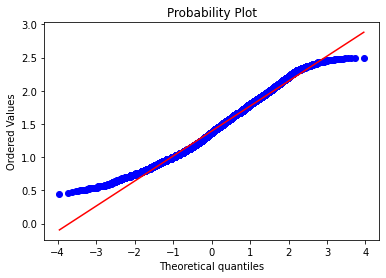

In [76]:
stats.probplot((newavo), plot=plt)

What's happening here? This is a probability ploy, which is used for visualising skew in a more concrete way. The theoretical quantiles represent 

## Correlation

Correlation between features can bring in training fatigue to your model, and it's best to try keeping the features as uncorrelated as possible, as it decreases training time and redundancy. 

In [77]:
avo.drop(columns=["Unnamed: 0", "type", "year", "region", "Date"], inplace=True)
avo.corr().abs()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,0.192752,0.208317,0.172928,0.179446,0.177088,0.174730,0.172940,0.117592
Total Volume,0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157
4046,0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377
4225,0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809
4770,0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861
Total Bags,0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233
Small Bags,0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845
Large Bags,0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858
XLarge Bags,0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000


<AxesSubplot:>

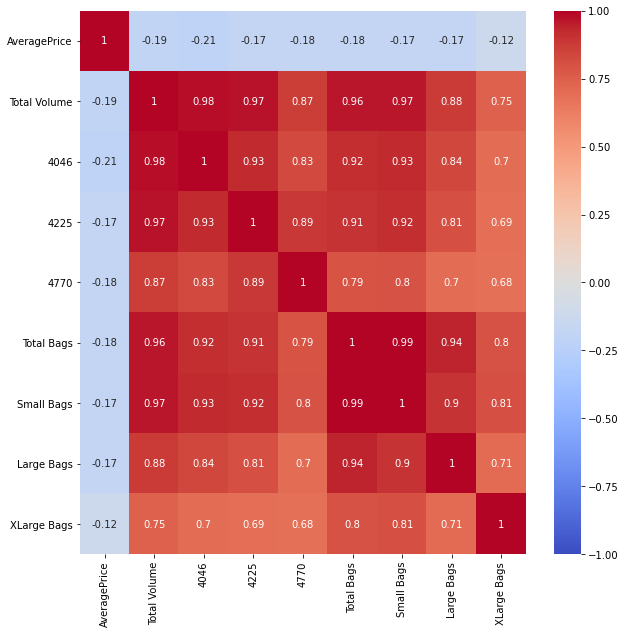

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(avo.corr(), vmin=-1, cmap="coolwarm", annot=True)

In [79]:
#select the upper matrix
upper = avo.corr().abs().where(np.triu(np.ones(avo.corr().shape), k=1).astype(np.bool))

#select index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#drop em
#avo.drop(avo[to_drop], axis=1)

## When to use what plots?

This is a very interesting question, especially given that you guys didn't even ask this. We have an entire course around data visualisation so I'll try to summarise the whole course in this cell block.

I feel this section is very important in the sense that in the industry a lot of data analysis goes in for problematising something and actually working on it, and you need to show visualisations not numbers when discussing with stakeholders and management. 

There are no hard and fast rules out there but there are a couple of things to consider 
* Think about what kind of data you're trying to visualise and what you're trying to convey from it. 
* Think about the colors. A simple rule to follow is to use complementary colors for different kinds of objects and supplementary colors for heatmaps, which you can pick by creating regular polygons over a color wheel. 
* Scale is important. 
* Too many categories? go for bar plot. Few categories? go for piechart. 
* Observe changes over time? line plot. 
* Need to visualise groupby objects? Use sankey diagrams. 
* Relationship between two variables? Use correlation plot.

In [14]:
#Pulling data from the NASA open data portal
data = pd.read_csv('https://data.nasa.gov/resource/gh4g-9sfh.csv')

#Creating the Exploratory Data Analysis of our dataset
report = pp.ProfileReport(data, title='Pandas Profiling Report')